In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
%matplotlib inline

In [2]:
subj_24 = pd.read_csv("https://explore-education-statistics.service.gov.uk/data-catalogue/data-set/0aa27be7-4958-4d9b-87c5-4af9ec6cd921/csv")

In [3]:
subj_24.columns

Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
       'country_name', 'version', 'old_la_code', 'new_la_code', 'la_name',
       'school_name', 'school_urn', 'school_laestab', 'exam_cohort',
       'qualification', 'level', 'asize', 'gsize', 'grade_structure',
       'subject', 'grade_total_entries', 'number_of_exams'],
      dtype='object')

In [4]:
schools_urn = [136298,138313,137353,100750,132942, 136309, 135073, 140939, 101162]

In [6]:
s = subj_24.loc[subj_24['school_urn'].isin(schools_urn)]
a_levels = s.loc[s['qualification']=='GCE A level']

In [23]:
school = 'The St Marylebone CofE School'

a_levels.loc[a_levels['school_name']==school]['subject'].value_counts()

subject
All subjects                 8
Biology                      8
Mathematics                  8
Art and Design (Fine Art)    7
Arabic                       7
Classical Civilisation       7
Dance                        7
Drama and Theatre Studies    7
Economics                    7
English Literature           7
French                       7
Geography                    7
Chemistry                    7
German                       7
Government and Politics      7
Italian                      7
History                      7
Japanese                     7
Mathematics (Further)        7
Media/Film/Tv Studies        7
Music                        7
Music Technology             7
Persian                      7
Physics                      7
Psychology                   7
Religious Studies            7
Sociology                    7
Spanish                      7
Turkish                      7
Name: count, dtype: int64

In [9]:
a_levels.head().T

,12448,12449,12450,12451,12452
time_period,202324,202324,202324,202324,202324
time_identifier,Academic year,Academic year,Academic year,Academic year,Academic year
geographic_level,School,School,School,School,School
country_code,E92000001,E92000001,E92000001,E92000001,E92000001
country_name,England,England,England,England,England
version,Final,Final,Final,Final,Final
old_la_code,209,209,209,209,209
new_la_code,E09000023,E09000023,E09000023,E09000023,E09000023
la_name,Lewisham,Lewisham,Lewisham,Lewisham,Lewisham
school_name,Prendergast School,Prendergast School,Prendergast School,Prendergast School,Prendergast School


In [13]:
course = a_levels.loc[(s['subject']==subj)].pivot(
index='school_name', 
columns='grade_total_entries', 
values='number_of_exams'
).reset_index()
c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
c = c.div(c['Total'], axis=0)
c['scho']=course['school_name']

In [14]:
c

grade_total_entries,*,A,B,C,D,E,Total,scho
0,0.176471,0.235294,0.294118,0.117647,0.058824,0.058824,1.0,Haberdashers' Hatcham College
1,0.200000,0.450000,0.233333,0.066667,0.050000,0.000000,1.0,Harris Westminster Sixth Form
2,0.071429,0.571429,0.214286,0.071429,0.071429,0.000000,1.0,Kingsdale Foundation School
3,0.058824,0.176471,0.411765,0.294118,0.000000,0.000000,1.0,Prendergast School
4,0.000000,0.333333,0.333333,0.166667,0.166667,0.000000,1.0,Sydenham and Forest Hill Sixth Form
5,0.000000,0.300000,0.300000,0.200000,0.200000,0.000000,1.0,The Charter School North Dulwich
6,0.291667,0.416667,0.208333,0.083333,0.000000,0.000000,1.0,The St Marylebone CofE School


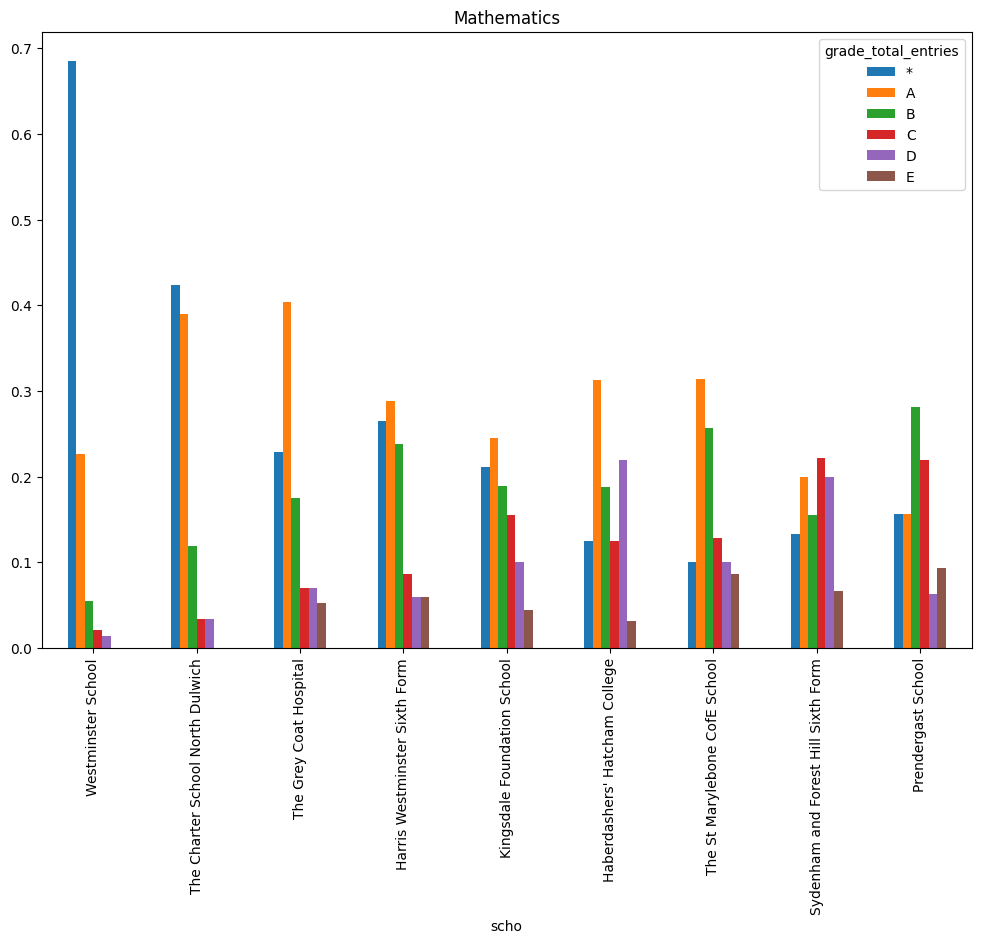

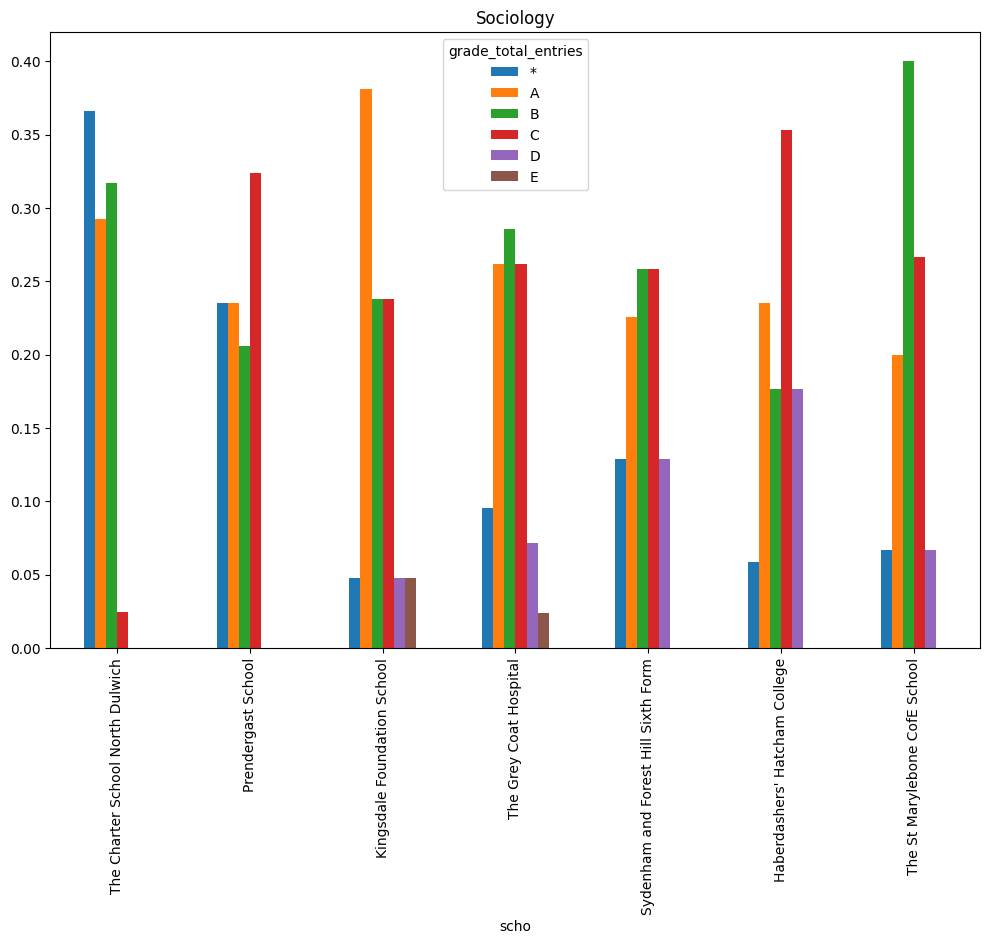

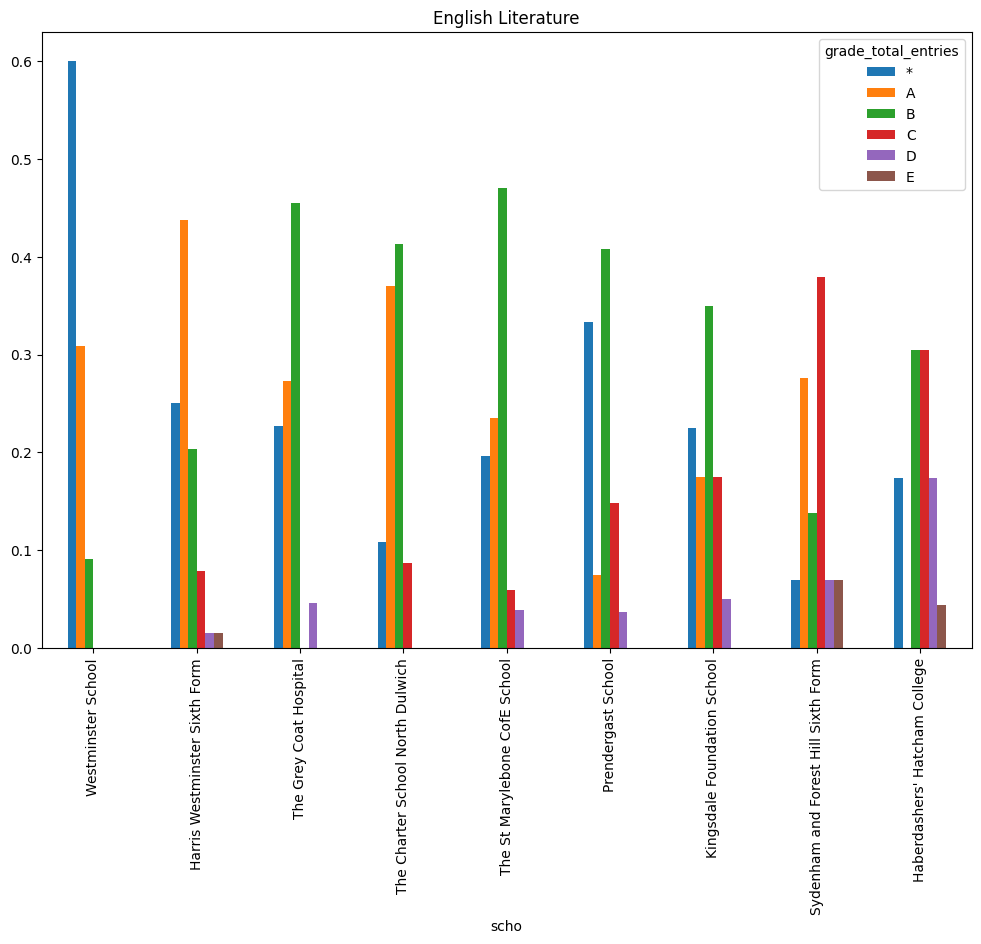

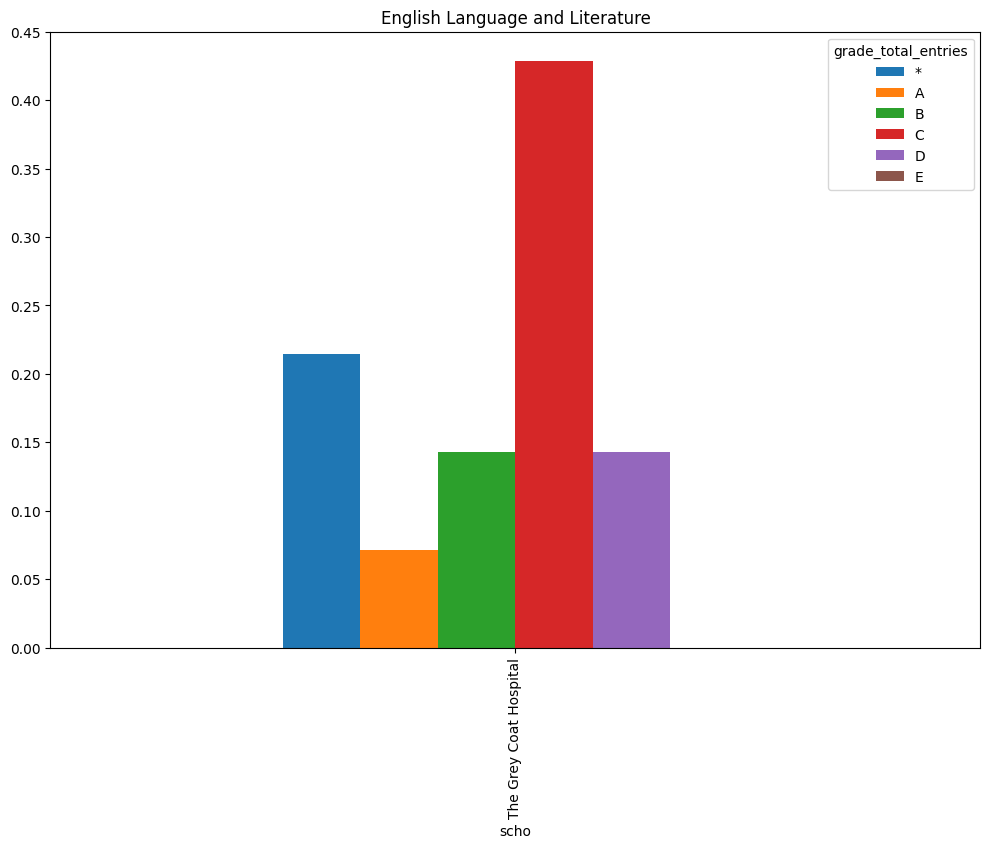

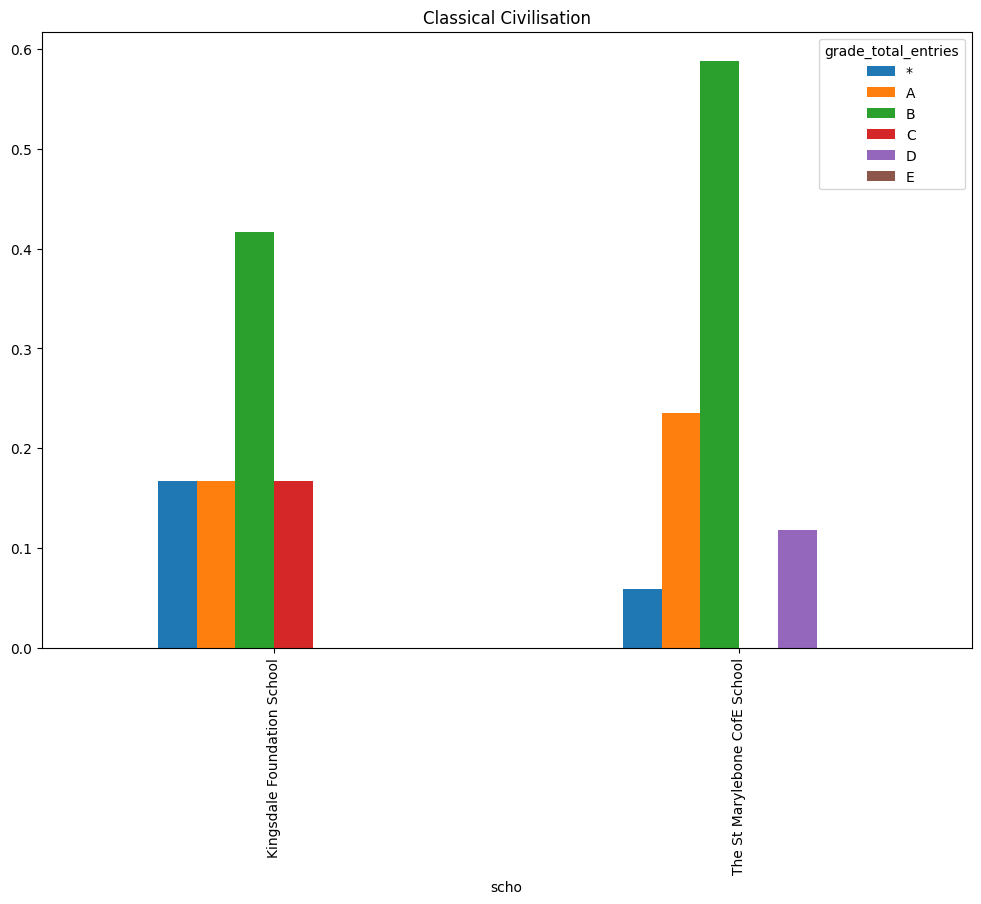

In [25]:
courses = ['Mathematics','Sociology','English Literature','English Language and Literature','Classical Civilisation']
# s = subj_23.loc[subj_23['URN'].isin(schools_urn) ].copy()


for subj in courses:
    course = a_levels.loc[(s['subject']==subj)].pivot(
        index='school_name', 
        columns='grade_total_entries', 
        values='number_of_exams'
        ).reset_index()
    c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
    c = c.div(c['Total'], axis=0)
    c['scho']=course['school_name']
    c['A*A'] = sum([c['*'], c['A']])
    c.sort_values(by='A*A', axis=0, ascending=False)[['scho','*', 'A', 'B', 'C', 'D', 'E',]].plot(
        kind='bar', x='scho', figsize=(12,8), title=subj)

/tmp/ipykernel_57048/3448591366.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  best = pd.concat([best, pd.DataFrame(


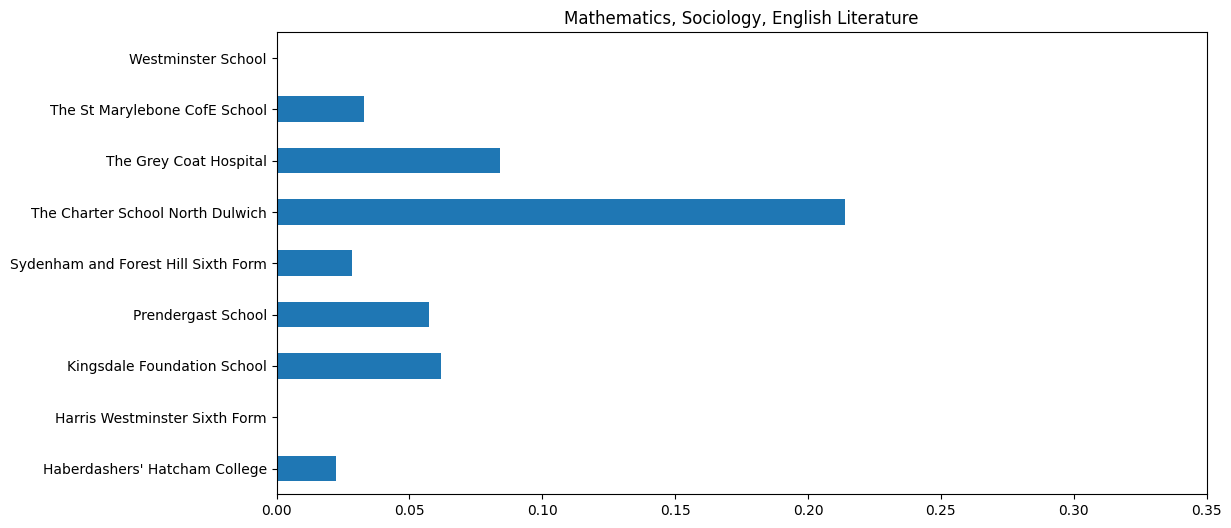

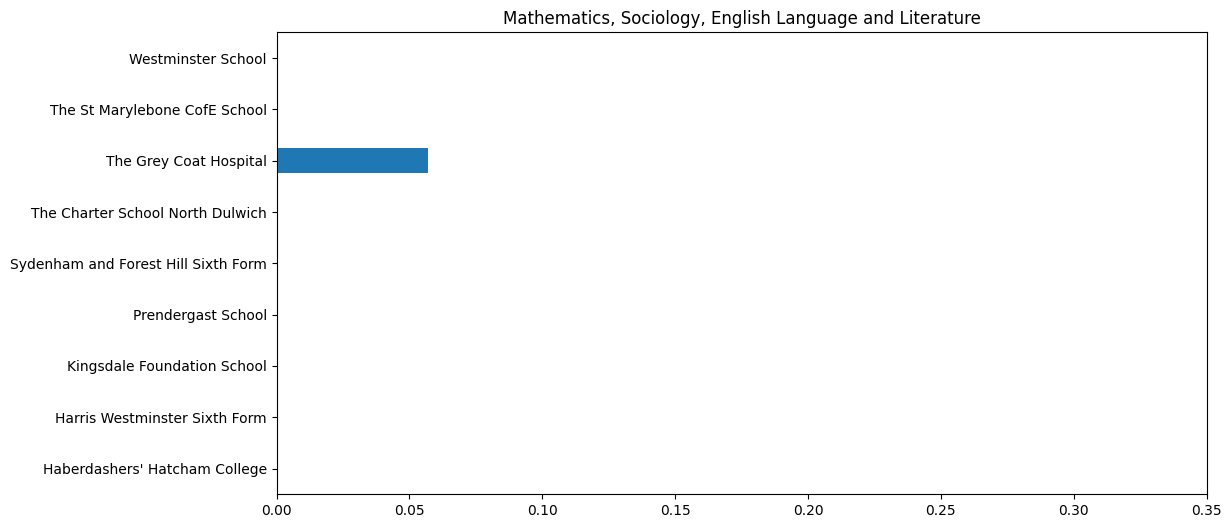

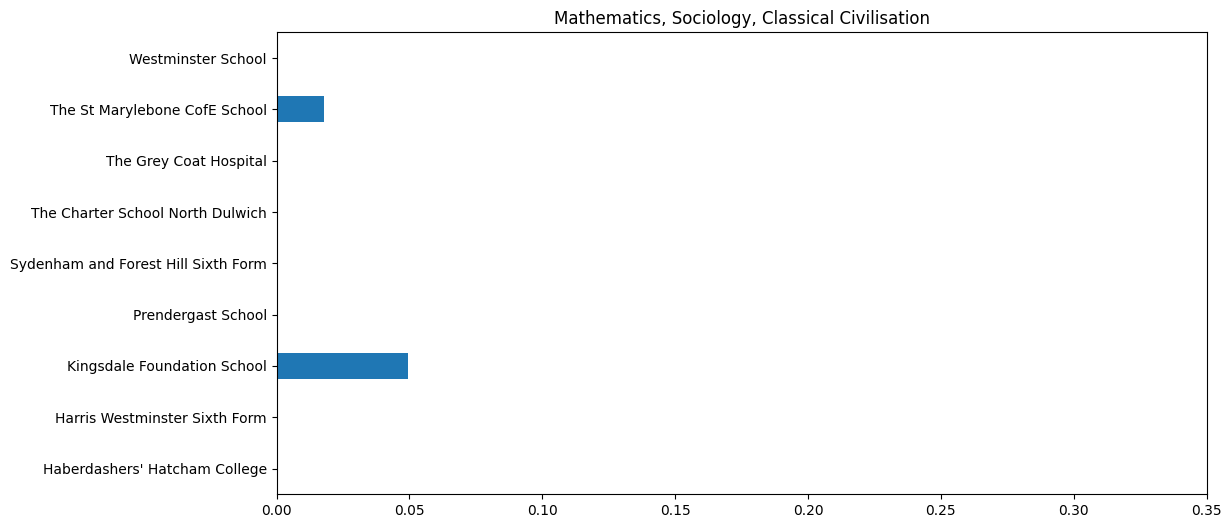

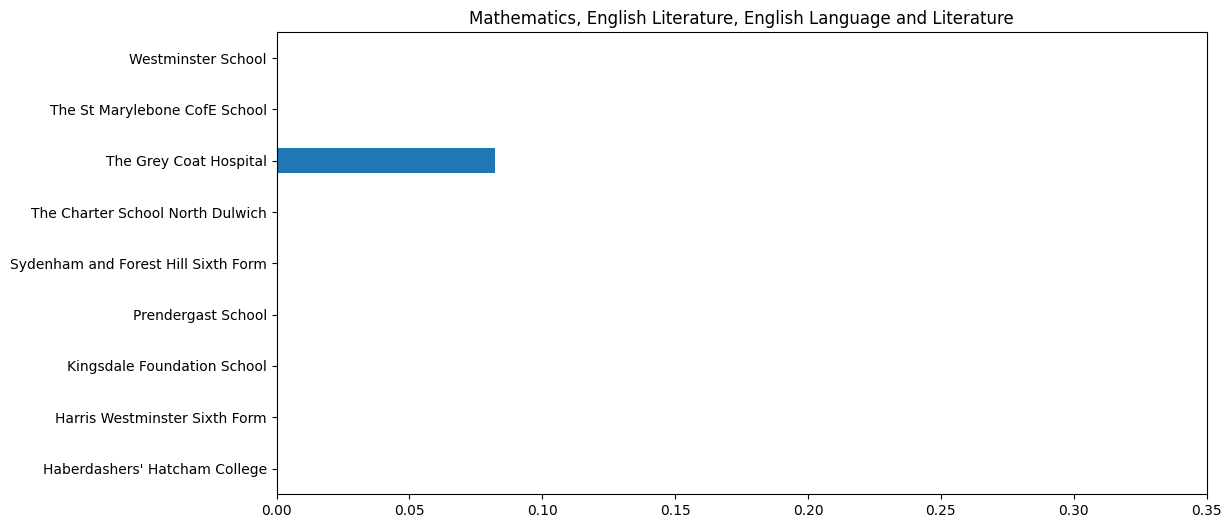

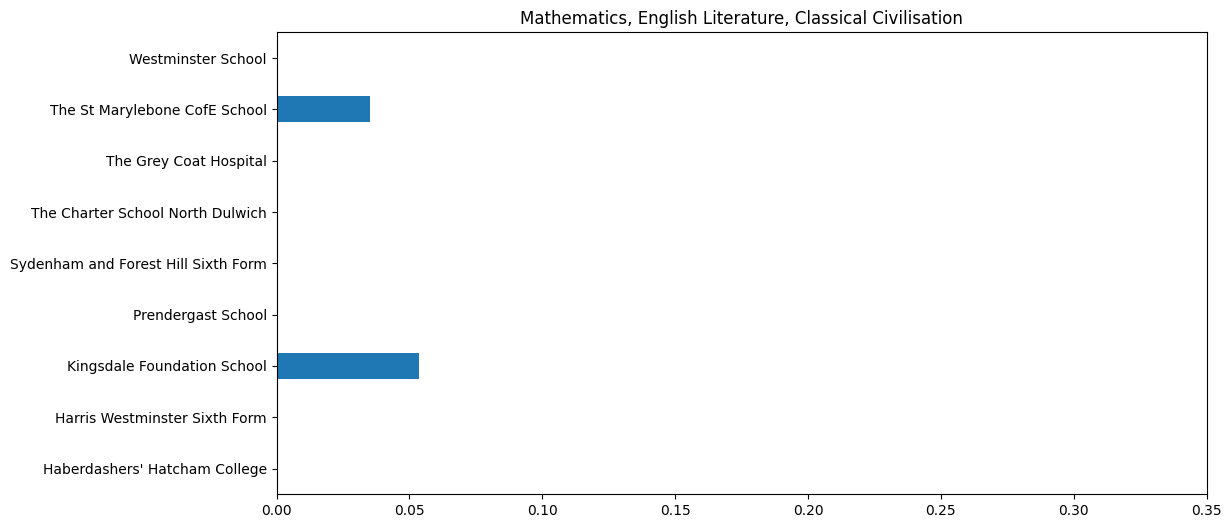

/tmp/ipykernel_57048/3448591366.py:38: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'Best School':prob.idxmax(),


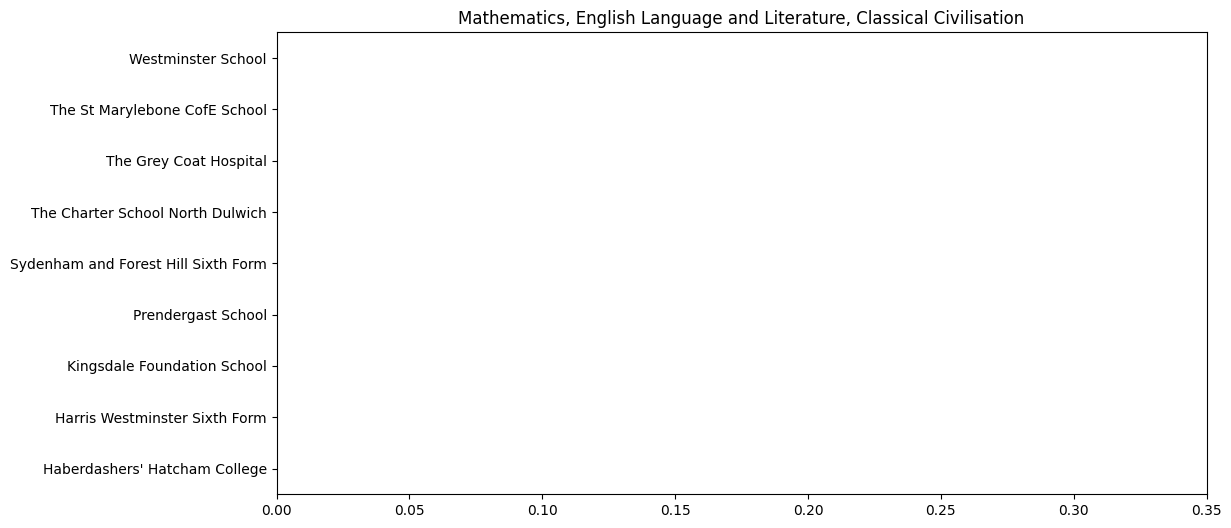

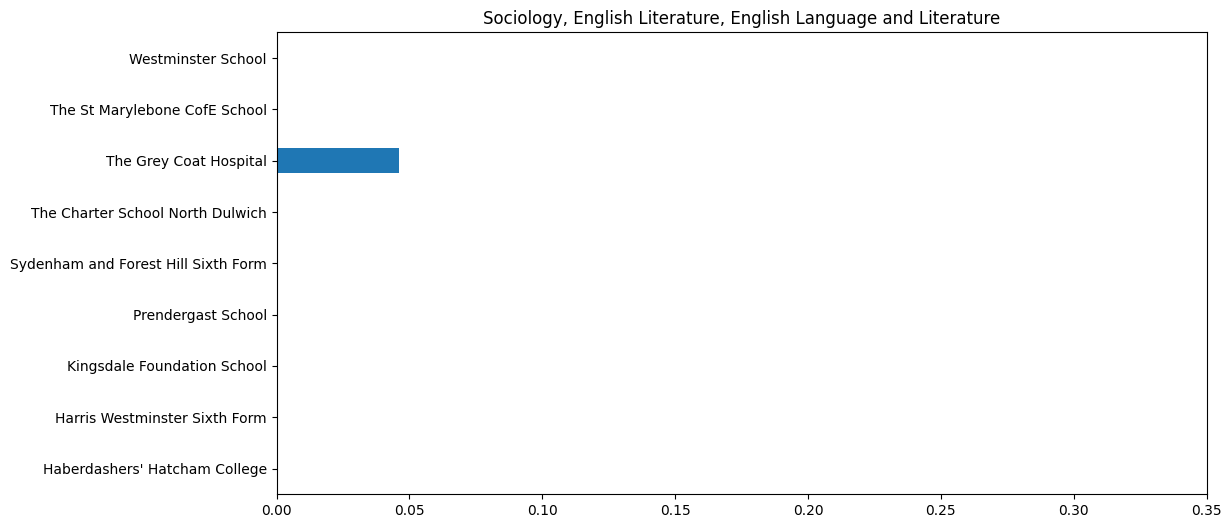

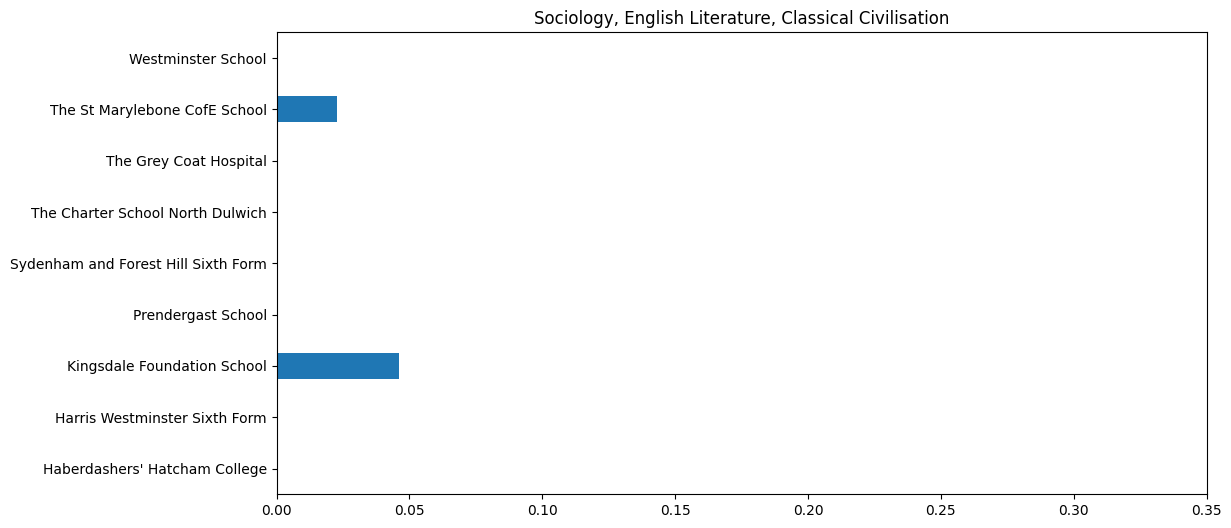

/tmp/ipykernel_57048/3448591366.py:38: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'Best School':prob.idxmax(),


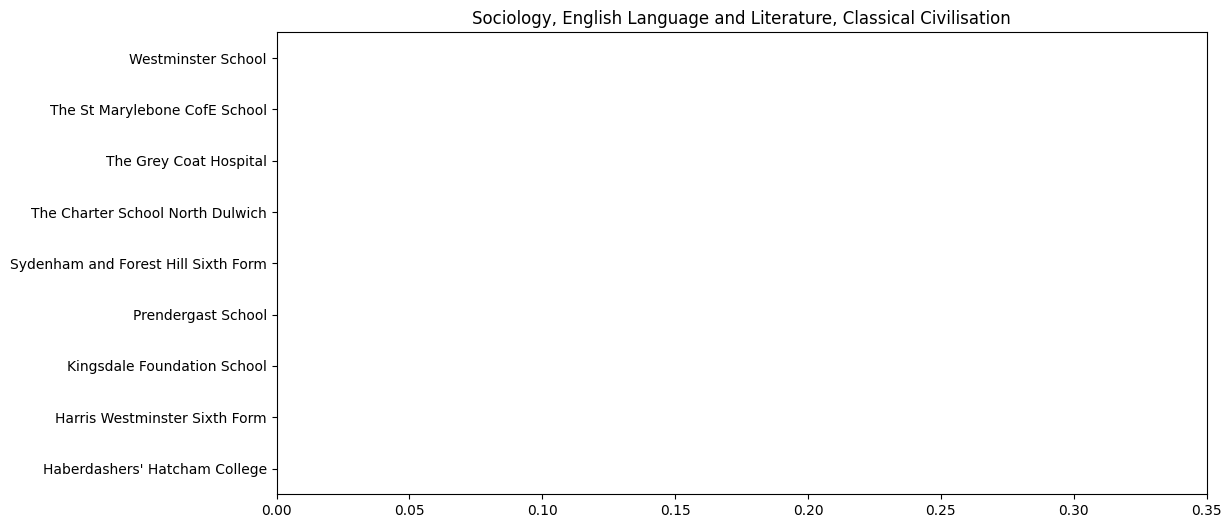

/tmp/ipykernel_57048/3448591366.py:38: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'Best School':prob.idxmax(),


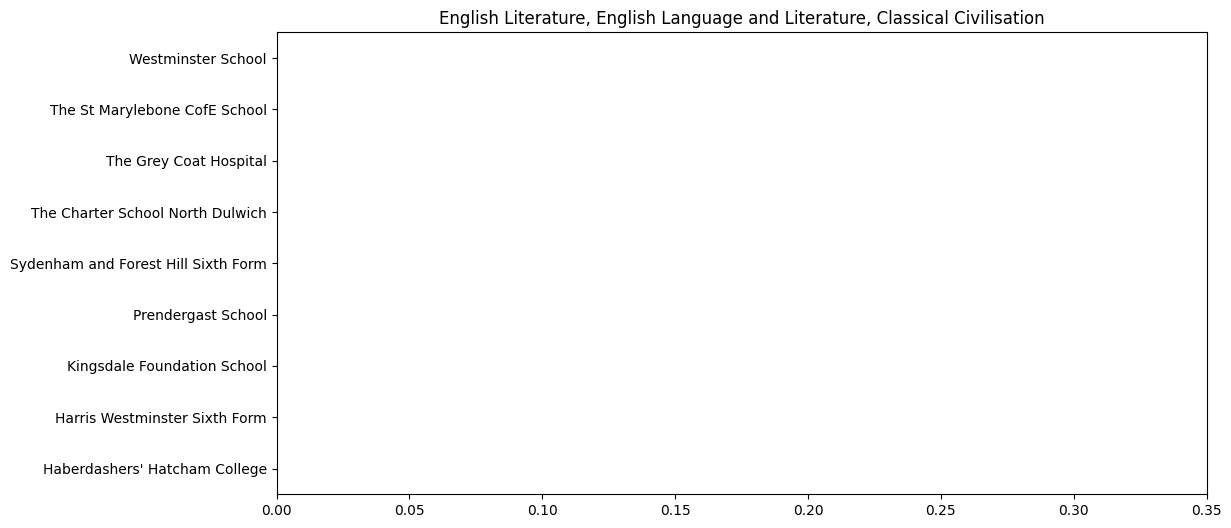

,Subject Combination,Probability,Best School,odds against
0,"Mathematics, Sociology, English Literature",0.21,The Charter School North Dulwich,3.8
1,"Mathematics, Sociology, English Language and L...",0.06,The Grey Coat Hospital,15.7
2,"Mathematics, Sociology, Classical Civilisation",0.05,Kingsdale Foundation School,19.0
3,"Mathematics, English Literature, English Langu...",0.08,The Grey Coat Hospital,11.5
4,"Mathematics, English Literature, Classical Civ...",0.05,Kingsdale Foundation School,19.0
5,"Mathematics, English Language and Literature, ...",NaN,NaN,NaN
6,"Sociology, English Literature, English Languag...",0.05,The Grey Coat Hospital,19.0
7,"Sociology, English Literature, Classical Civil...",0.05,Kingsdale Foundation School,19.0
8,"Sociology, English Language and Literature, Cl...",NaN,NaN,NaN
9,"English Literature, English Language and Liter...",NaN,NaN,NaN


In [26]:
def grade_subj(subj, a_level_results):
    course = a_level_results.loc[(a_level_results['subject']==subj)].pivot(
    index='school_name', 
    columns='grade_total_entries', 
    values='number_of_exams'
    ).reset_index()
    c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
    c = c.div(c['Total'], axis=0)
    c['school_name']=course['school_name']
    c['A*A'] = sum([c['*'], c['A']])
    return c[['school_name','A*A', 'A']].set_index('school_name')

schools = ["Haberdashers' Hatcham College",
 'Harris Westminster Sixth Form',
 'Kingsdale Foundation School',
 'Prendergast School',
 'Sydenham and Forest Hill Sixth Form',
 'The Charter School North Dulwich',
 'The Grey Coat Hospital',
 'The St Marylebone CofE School',
 'Westminster School']

best = pd.DataFrame(columns = ['Best School','Probability','Subject Combination'], index=[])
odds = pd.DataFrame(index=schools)

for choice in itertools.combinations(courses, 3):
    df = pd.DataFrame({'A*A':[1.]*len(schools), 'A':[1.]*len(schools)},index=schools)
    for subj in choice:
        subject_dist =  grade_subj(subj, a_levels)
        df['A*A'] = df['A*A']*subject_dist['A*A']
        df['A'] = df['A']*subject_dist['A']
    choice_str = ", ".join(choice)
    prob= df['A*A']-df['A']
    odds[choice_str] = ((1-prob)/prob).round(1)
    best = pd.concat([best, pd.DataFrame(
        {'Subject Combination':choice_str,
         'Probability':prob.max().round(2),
         'Best School':prob.idxmax(), 
          
         }, index=[0])], ignore_index=True)
    
    

    ax = prob.plot(kind='barh', figsize=(12,6), title=choice_str)
    ax.set_xlim(0,0.35)
    plt.show()
best['odds against'] = ((1-best['Probability'])/best['Probability']).round(1)
best[['Subject Combination',
         'Probability',
         'Best School', 'odds against']]

    


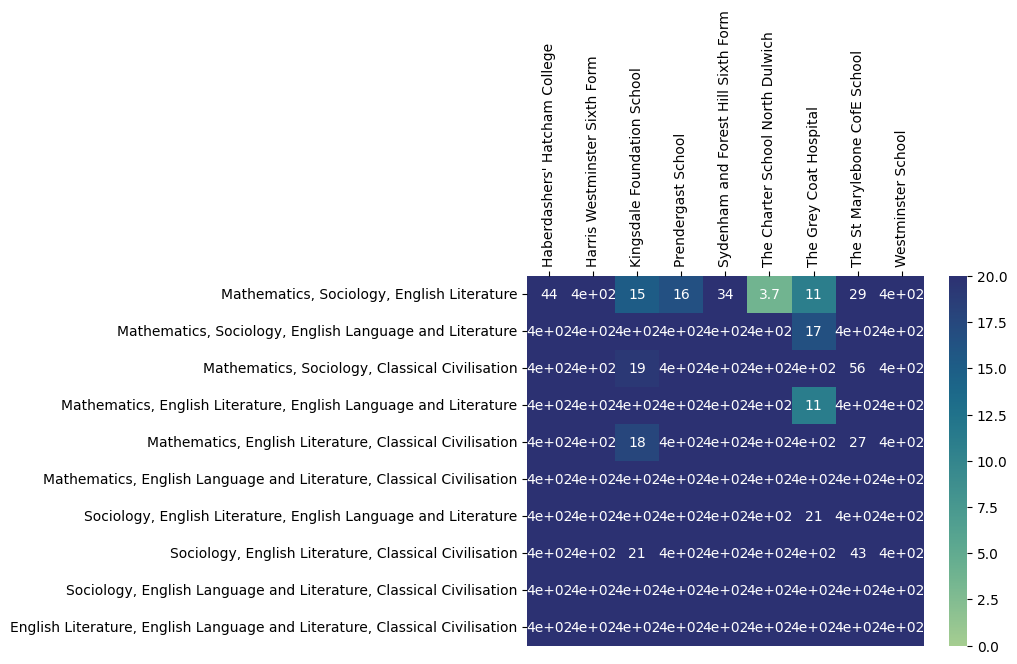

In [27]:
ax = sns.heatmap(odds.T.fillna(400).sort_values(by='The Charter School North Dulwich'), cmap="crest", annot=True, vmin=0, vmax=20)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=90)